Enter xMin: 150
Enter yMin: 150
Enter xMax: 350
Enter yMax: 350
Enter the number of points: 5
Enter Point 1:  100 120
Enter Point 2: 220 250
Enter Point 3: 330 320
Enter Point 4: 380 400
Enter Point 5: 420 450


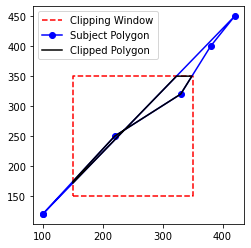

In [1]:
import matplotlib.pyplot as plt

# function to check if a point is inside or outside the clip edge
def inside(p, cp1, cp2):
    return (cp2[0]-cp1[0])*(p[1]-cp1[1]) > (cp2[1]-cp1[1])*(p[0]-cp1[0])

# function to compute intersection point of two edges
def computeIntersection(cp1, cp2, s, e):
    dc = [cp1[0] - cp2[0], cp1[1] - cp2[1]]
    dp = [s[0] - e[0], s[1] - e[1]]
    n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
    n2 = s[0] * e[1] - s[1] * e[0]
    n3 = 1.0 / (dc[0] * dp[1] - dc[1] * dp[0])
    # using determinants to compute intersection point
    return [(n1*dp[0] - n2*dc[0]) * n3, (n1*dp[1] - n2*dc[1]) * n3]

# main function for Sutherland-Hodgman algorithm
def sutherlandHodgman(subject_polygon, clip_polygon):
    output_list = subject_polygon
    cp1 = clip_polygon[-1]
    for clip_vertex in clip_polygon:
        cp2 = clip_vertex
        input_list = output_list
        output_list = []
        s = input_list[-1]
        for subject_vertex in input_list:
            e = subject_vertex
            if inside(e, cp1, cp2):
                if not inside(s, cp1, cp2):
                    # if the edge intersects the clip edge, compute intersection point
                    output_list.append(computeIntersection(cp1, cp2, s, e))
                output_list.append(e)
            elif inside(s, cp1, cp2):
                # if the edge exits the clip edge, compute intersection point
                output_list.append(computeIntersection(cp1, cp2, s, e))
            s = e
        cp1 = cp2
    return output_list

# getting input from user
x_min = int(input("Enter xMin: "))
y_min = int(input("Enter yMin: "))
x_max = int(input("Enter xMax: "))
y_max = int(input("Enter yMax: "))

# defining the clip polygon as a rectangle
clip_polygon = [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]]

n = int(input("Enter the number of points: "))
subject_polygon = []
for i in range(n):
    x, y = map(int, input(f"Enter Point {i + 1}: ").split())
    subject_polygon.append([x, y])
subject_polygon.append(subject_polygon[0])

# applying Sutherland-Hodgman algorithm to clip the subject polygon
clipped_polygon = sutherlandHodgman(subject_polygon, clip_polygon)

# plotting the original clipping rectangle, the original subject polygon, and the clipped polygon
x = [x_min, x_max, x_max, x_min, x_min]
y = [y_min, y_min, y_max, y_max, y_min]

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(x, y, 'r--', label='Clipping Window')

ax.plot(*zip(*subject_polygon), 'bo-', label='Subject Polygon')
ax.plot(*zip(*clipped_polygon), 'k-', label='Clipped Polygon')
ax.legend()
plt.show()
